In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline


## Loading and Preprocessing Loans Encoded Data

In [2]:
# Loading data
diabetes_df = pd.read_csv("resources/diabetes_prediction_cleaned.csv")
diabetes_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,hba1c_level,blood_glucose_level,diabetes_status
0,1,80.0,0,1,0,2,2,2,0
1,1,54.0,0,0,1,2,2,0,0
2,0,28.0,0,0,0,2,1,2,0
3,1,36.0,0,0,2,1,0,2,0
4,0,76.0,1,1,2,1,0,2,0


In [4]:
# Define features set
X = diabetes_df.copy()
X.drop("diabetes_status", axis=1, inplace=True)
X.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,hba1c_level,blood_glucose_level
0,1,80.0,0,1,0,2,2,2
1,1,54.0,0,0,1,2,2,0
2,0,28.0,0,0,0,2,1,2
3,1,36.0,0,0,2,1,0,2
4,0,76.0,1,1,2,1,0,2


In [6]:
# Define target vector
y = diabetes_df["diabetes_status"].ravel()
y[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [7]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [8]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [9]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [10]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Fitting the Random Forest Model

In [11]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [12]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

## Making Predictions Using the Random Forest Model

In [13]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

## Model Evaluation

In [14]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [15]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,22165,748
Actual 1,1293,794


Accuracy Score : 0.91836
Classification Report
              precision    recall  f1-score   support

           0       0.94      0.97      0.96     22913
           1       0.51      0.38      0.44      2087

    accuracy                           0.92     25000
   macro avg       0.73      0.67      0.70     25000
weighted avg       0.91      0.92      0.91     25000



## Feature Importance

In [16]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.40878076173964295, 'age'),
 (0.23739549301817037, 'hba1c_level'),
 (0.09969519860113163, 'blood_glucose_level'),
 (0.08011754186539119, 'smoking_history'),
 (0.07690620086428293, 'bmi'),
 (0.04699756971740775, 'hypertension'),
 (0.03383289491614425, 'heart_disease'),
 (0.016274339277828873, 'gender')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

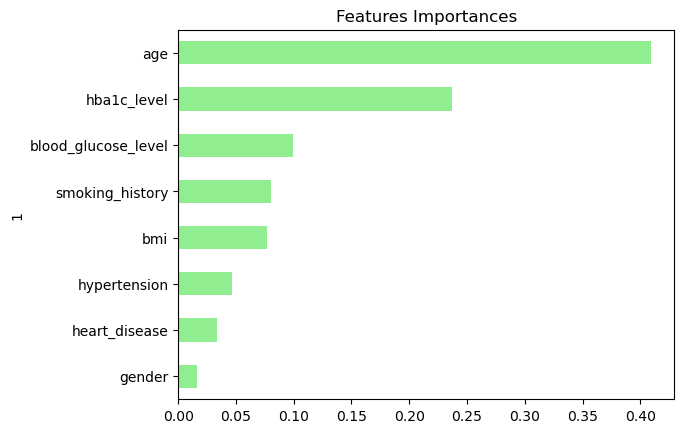

In [17]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)